# Taylor Study Session

In [1]:
#Libraries
import numpy as np # Used to do some math 
import matplotlib.pyplot as plt # Used to plot graph
import sympy as sp # Used to do symbolic calculus
import sympy.abc as abc # Used to create a symbol

## First exercise.

$f(x) = 2x \cos^2(\frac{x}{2}) - x$ around $x_0 = 0$

In [18]:
#Implement our constant
x_0 = 0 
x = np.linspace(0,2*np.pi,100) 

''' 
Here we use the linspace function from the numpy library to create a close interval that goes from 0 to 2pi with 100 point in it.
Remark : we can transform this closed interval to an open one using python slicing np.linspace(0,2*np.pi,100)[1:-1]
the [1:-1] means that we don't take into account the first element and the last one on the list.
'''

#Implement our real function 
f = 2*x*(np.cos(x/2))**2 - x # We use numpy librairy to call the cosine function

In [2]:
#Use Sympy to apply Taylor's theorem
x_symbolic = abc.x # Using The "abc" function from sympy librairy to transform the variable "x" into a symbol (same as the x that we could use in an equation)

#Implement our symbolic function
f_symbolic = 2*x_symbolic*(sp.cos(x_symbolic/2))**2 - x_symbolic

'''
Here I am implementing the symbolic function using sympy.abc. So when I need to implement the cosine, I need to use the one given
by sympy and not numpy. Why ? Because numpy wants to play with real number and not symbol.
Keep in mind that the variable used by sympy have the same meaning than the one that we use in Calculus.  
'''

#Implement the Taylor serie
f_symbolic_Taylor = f_symbolic.series(x_symbolic, x0 = 0, n = 12) # Using the function .series that create the Taylor series

'''
The .series function take three arguments (the symbolic variable, the delta x, the order of accuracy). The order of accuracy 'n'
correspond to the number of terms we keep in the series. If you want to increase the accuracy you can increase 'n'
'''

f_symbolic_approximation = f_symbolic_Taylor.removeO() # Using the function .removeO to delete de junk term of the Taylor series

#Create a python function that compute f_symbolic_approximation for any x in an interval
f_symbolic_approximation = sp.lambdify(x_symbolic, f_symbolic_approximation)

'''
The function .lambdify from sympy library will transform our symbolic function into an numerical function. But it did it by
creating a python definition of the form

def f_symbolic_approximation(x):
    blablabla

So it means That f_symbolic_approximation, now, needs a variable as an input. This variable ('x') is the interval containing all
the point from wich we want our function to be evaluate. 
'''

"\nThe function .lambdify from sympy library will transform our symbolic function into an numerical function. But it did it by\ncreating a python definition of the form\n\ndef f_symbolic_approximation(x):\n    blablabla\n\nSo it means That f_symbolic_approximation, now, needs a variable as an input. This variable ('x') is the interval containing all\nthe point from wich we want our function to be evaluate. \n"

"\n.legend display the legend on the plot. loc='best' look for the best position in the screen\n"

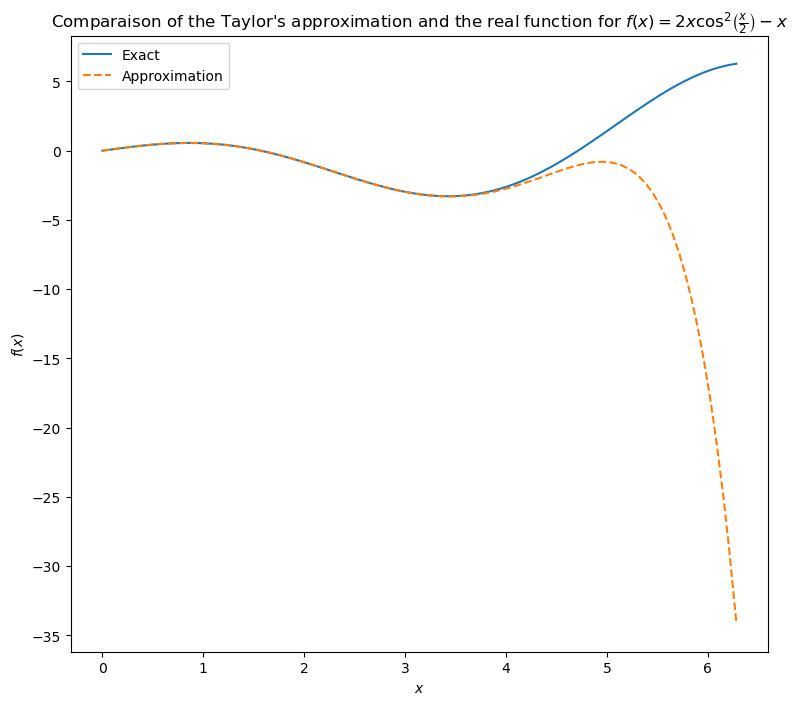

In [22]:
#Plot the real function and the approximation using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(9,8)) 

'''
Here we use matplotlib to plot graph. When we want to plot multiple graph we can use .subplots. It will create a grid (matrix) of graphs
.subplots takes three arguments (#Rows,#Columns, figsize) the first one says the number of plots in a row, the second one is the number
of plot in a column and the last the size of everything.
.subplots gives you back two things : figure and axes. 
'''

ax.plot(x,f, label = "Exact")
ax.plot(x,f_symbolic_approximation(x), '--' ,label = "Approximation")

'''
.plot is used to actually plot a graph. takes to arguments (x,y). You can also add other optional parameter as labels, the type of lines, colors ... 
'''

plt.title(r"Comparaison of the Taylor's approximation and the real function for $f(x) = 2x \cos^2\left(\frac{x}{2}\right) - x$") # Set a title to the plot

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$') 

'''
Set the label for the x and y axis. The syntax r'$x$' let us use latex to diplay what is inside $$. If you don't want to use
latex, you can just write ax.set_xlabel('x').
'''

plt.legend(loc='best')

'''
.legend display the legend on the plot. loc='best' look for the best position in the screen
'''

### Documentations :

The best way to really understand and learn python is to read documentation. So here are the links to the documentation of the functions and libraries we used for this exercise :

Numpy : https://numpy.org/doc/stable/

Sympy : https://docs.sympy.org/latest/index.html

Matplotlib : https://matplotlib.org/stable/index.html


np.linspace : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

sp.abc : https://docs.sympy.org/latest/modules/abc.html

sp.Series : https://docs.sympy.org/latest/modules/series/series.html

sp.lambdify : https://docs.sympy.org/latest/modules/utilities/lambdify.html